Importing the Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib

Data Collection and Processing

In [131]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv('gold_price_data.csv')

In [132]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [133]:
# print last five rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [134]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [135]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [136]:
# checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [137]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [138]:
correlation = gold_data.corr

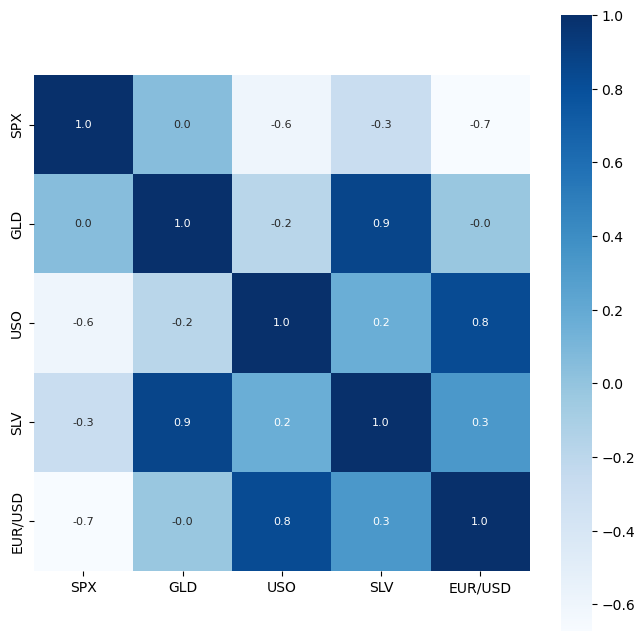

In [139]:
correlation = gold_data.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()


In [140]:
# print correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


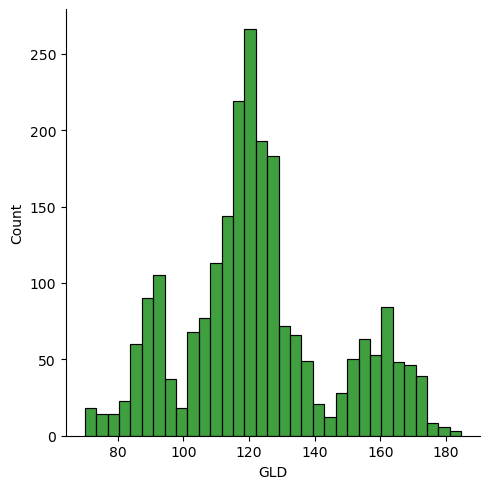

In [141]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target

In [142]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']
joblib.dump(regressor,'gold-trained-predictions.joblib')

['gold-trained-predictions.joblib']

In [143]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [144]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [146]:
regressor = RandomForestRegressor(n_estimators=100)

In [147]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [148]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [149]:
print(test_data_prediction)

[168.44109942  82.01279995 116.39189973 127.61320058 120.60440122
 154.68949723 150.20289807 126.0368002  117.55169864 125.97910046
 117.02650098 171.5857005  141.64529836 167.87659851 115.15600005
 117.33880057 139.65930312 170.10790122 159.14310327 158.16849904
 155.15640053 125.36899998 175.75879934 157.54130329 125.18670039
  93.63429991  77.47780006 120.64590011 119.13919944 167.49390015
  88.28260062 125.55520058  90.99710079 117.91170018 121.20689959
 136.49840093 115.33010145 114.95740079 148.10439971 107.05760109
 104.3793023   87.07109789 126.50500053 118.05549962 153.81049912
 119.53290034 108.36379974 108.2231987   93.1968007  127.23709734
  75.6678003  113.76689937 121.4616999  111.05229929 118.85309891
 120.65789924 159.77059976 169.07910095 147.12469678  85.73939857
  94.23970038  86.65829878  90.6540002  118.96170092 126.46880059
 127.56419993 169.05089992 122.26669922 117.46609888  98.89710055
 167.58960149 142.98999764 132.0861018  121.23980199 120.89359927
 119.68730

In [150]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9886487696439887


Compare the actual values and predicted values in a plot

In [151]:
Y_test = list(Y_test)

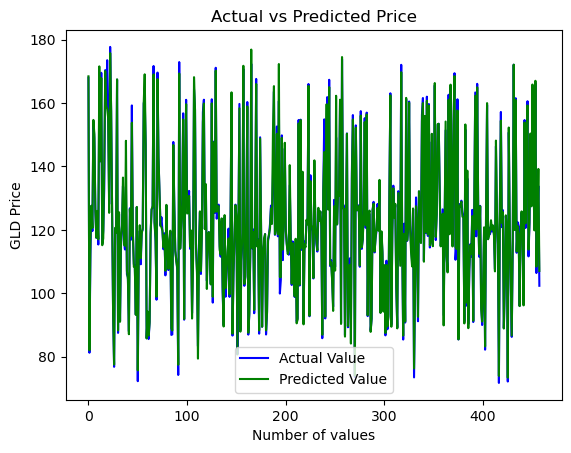

In [152]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()